Example 1: Basic Classification
Prediction for [2,2]: [1]
Class probabilities: [[0. 1.]]

Example 2: Iris Dataset Classification

Example 3: Handling Missing Values
Predictions with missing value in training: [0 0 1 1]
Prediction for missing test value: [1]
Prediction with weighted majority: [1]


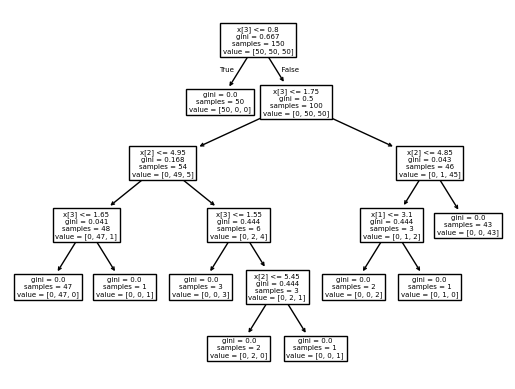

In [23]:
### 1.10.1. Classification

# Import required libraries
from sklearn import tree
import numpy as np

# Example 1: Basic Classification
print("Example 1: Basic Classification")
X = [[0, 0], [1, 1]]           # Feature matrix with 2 samples, each having 2 features
Y = [0, 1]                     # Target array with binary labels (0 and 1)
clf = tree.DecisionTreeClassifier()  # Create a decision tree classifier object
clf = clf.fit(X, Y)           # Train the classifier on the data

# Test the classifier
result = clf.predict([[2., 2.]])   # Predict class for a new sample [2,2]
print("Prediction for [2,2]:", result)  # Should predict class 1 since closer to [1,1]

# Get probability estimates
proba = clf.predict_proba([[2., 2.]])  # Get probability estimates for each class
print("Class probabilities:", proba)    # Shows probability of belonging to each class

# Example 2: Iris Dataset Classification
print("\nExample 2: Iris Dataset Classification")
from sklearn.datasets import load_iris
iris = load_iris()                    # Load the built-in iris dataset
X, y = iris.data, iris.target        # Split into features (X) and target (y)

clf = tree.DecisionTreeClassifier()   # Create a new classifier
clf = clf.fit(X, y)                  # Train on the iris dataset

# Visualize the decision tree 
tree.plot_tree(clf)                   # Plot the trained decision tree

# Example 3: Handling Missing Values
print("\nExample 3: Handling Missing Values")
# Case 1: Missing values in training data
X = np.array([0, 1, 6, np.nan]).reshape(-1, 1)  # Create feature array with one missing value
y = [0, 0, 1, 1]                                # Create corresponding labels
tree = DecisionTreeClassifier(random_state=0).fit(X, y)  # Train classifier
print("Predictions with missing value in training:", tree.predict(X))

# Case 2: Missing values in test data and majority class
X = np.array([np.nan, -1, np.nan, 1]).reshape(-1, 1)  # Features with missing values
y = [0, 0, 1, 1]                                      # Labels
tree = DecisionTreeClassifier(random_state=0).fit(X, y)  # Train classifier
X_test = np.array([np.nan]).reshape(-1, 1)             # Test data with missing value
print("Prediction for missing test value:", tree.predict(X_test))

# Case 3: Missing values in test data and weighted majority
X = np.array([0, 1, 2, 3]).reshape(-1, 1)  # Features without missing values
y = [0, 1, 1, 1]                           # Labels with class imbalance
tree = DecisionTreeClassifier(random_state=0).fit(X, y)  # Train classifier
X_test = np.array([np.nan]).reshape(-1, 1)              # Test with missing value
print("Prediction with weighted majority:", tree.predict(X_test))

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node with value=[[0.33  0.304 0.366]]: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node with value=[[1. 0. 0.]].
	node=2 is a split node with value=[[0.    0.453 0.547]]: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 is a leaf node with value=[[0.    0.917 0.083]].
		node=4 is a leaf node with value=[[0.    0.026 0.974]].


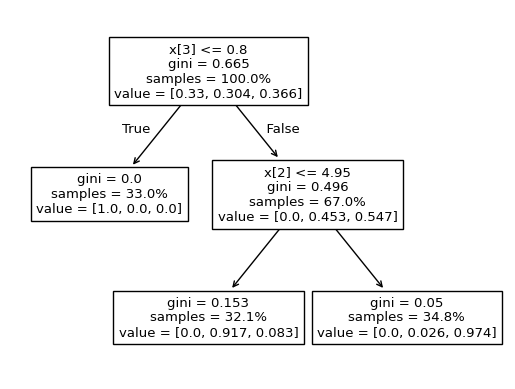

Rules used to predict sample 0:

decision node 0 : (X_test[0, 3] = 2.4) > 0.800000011920929)
decision node 2 : (X_test[0, 2] = 5.1) > 4.950000047683716)

The following samples [0, 1] share the node(s) [0 2] in the tree.
This is 40.0% of all nodes.


In [24]:
### Understand decision tree structure examples

# Import required libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()                    # Load the built-in iris dataset
X = iris.data                         # Features matrix
y = iris.target                       # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  # 75% train, 25% test

# Create and train the decision tree classifier with max 3 leaf nodes
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)  # Initialize classifier
clf.fit(X_train, y_train)                                       # Train the model

# Get various tree attributes
n_nodes = clf.tree_.node_count                 # Total number of nodes
children_left = clf.tree_.children_left        # Array of left children node indices
children_right = clf.tree_.children_right      # Array of right children node indices
feature = clf.tree_.feature                    # Array of features used for splitting
threshold = clf.tree_.threshold                # Array of thresholds used for splitting
values = clf.tree_.value                       # Array of values at each node

# Initialize arrays to store node information
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)  # Array to store depth of each node
is_leaves = np.zeros(shape=n_nodes, dtype=bool)       # Array to mark leaf nodes

# Initialize stack with root node (id=0) and its depth (0)
stack = [(0, 0)]  

# Traverse the tree using depth-first search
while len(stack) > 0:
    node_id, depth = stack.pop()               # Get current node and its depth
    node_depth[node_id] = depth                # Store the depth
    
    # Check if current node is a split node
    is_split_node = children_left[node_id] != children_right[node_id]
    
    if is_split_node:
        # Add child nodes to stack for processing
        stack.append((children_left[node_id], depth + 1))   # Add left child
        stack.append((children_right[node_id], depth + 1))  # Add right child
    else:
        is_leaves[node_id] = True              # Mark as leaf node

# Print tree structure
print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)

# Print information for each node
for i in range(n_nodes):
    if is_leaves[i]:
        # Print leaf node information
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=np.around(values[i], 3)
            )
        )
    else:
        # Print split node information
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=np.around(values[i], 3),
            )
        )

# Visualize the decision tree
tree.plot_tree(clf, proportion=True)
plt.show()

# Get decision path and leaf nodes for test samples
node_indicator = clf.decision_path(X_test)    # Get decision path matrix for test samples
leaf_id = clf.apply(X_test)                   # Get leaf node indices for test samples

# Analyze decision path for first test sample
sample_id = 0
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]   # Get nodes visited by first test sample

# Print decision rules for the sample
print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    if leaf_id[sample_id] == node_id:   # Skip if current node is the leaf node
        continue
        
    # Determine if sample value is <= or > than threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"
        
    # Print decision rule at this node
    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

# Find common nodes between two samples
sample_ids = [0, 1]                    # Select first two test samples
common_nodes = node_indicator.toarray()[sample_ids].sum(axis=0) == len(sample_ids)  # Find shared nodes
common_node_id = np.arange(n_nodes)[common_nodes]  # Get indices of common nodes

# Print information about common nodes
print(
    "\nThe following samples {samples} share the node(s) {nodes} in the tree.".format(
        samples=sample_ids, nodes=common_node_id
    )
)
print("This is {prop}% of all nodes.".format(prop=100 * len(common_node_id) / n_nodes))

In [34]:
### 1.4.1.1. Multi-class classification

from sklearn import svm

# Create simple dataset with 4 samples and 4 classes
X = [[0], [1], [2], [3]]          # Feature matrix: 4 samples, 1 feature each
Y = [0, 1, 2, 3]                  # Target array: 4 different classes

# Create SVC classifier with one-vs-one (ovo) decision function shape
clf = svm.SVC(decision_function_shape='ovo')  # ovo means each class is compared against each other class
clf.fit(X, Y)                     # Train the classifier on the data

# Get decision function values for a test point
dec = clf.decision_function([[1]])  # Get decision scores for sample value 1
print(dec.shape[1])               # Number of decision functions: 6 (n*(n-1)/2 where n=4 classes)
                                 # For 4 classes, we get 6 comparisons: 0vs1, 0vs2, 0vs3, 1vs2, 1vs3, 2vs3

# Switch to one-vs-rest (ovr) decision function shape
clf.decision_function_shape = "ovr"  # ovr means each class is compared against all other classes combined
dec = clf.decision_function([[1]])   # Get decision scores with new shape
print(dec.shape[1])                  # Number of decision functions: 4 (one for each class)

# Try LinearSVC which uses one-vs-rest by default
lin_clf = svm.LinearSVC()            # Create linear SVM classifier
lin_clf.fit(X, Y)                    # Train the classifier
dec = lin_clf.decision_function([[1]])  # Get decision scores
print(dec.shape[1])                  # Number of decision functions: 4 (one per class)

6
4
4


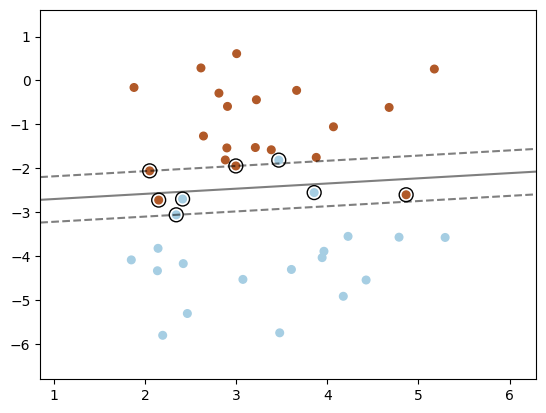

In [37]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# Create 40 separable points without fixed random state
X, y = make_blobs(n_samples=40, centers=2)  # Each run will generate different points

# Fit SVM model with linear kernel
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

# Create scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision boundary
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

# Plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.show()

The key difference is that without random_state=6, the generated data points will be random each time you run the code. This means:

The positions of the blue and red dots will be different in each run
The separating hyperplane (solid line) will have a different orientation and position
The margin boundaries (dashed lines) will be in different locations
The support vectors (points with black circles around them) will be different

This happens because make_blobs() uses random number generation to create the synthetic dataset. When we specify random_state=6, we're essentially "seeding" the random number generator to always produce the same sequence of random numbers, resulting in the same data points every time.


Results for gini criterion:
Accuracy: 1.000

Feature Importances:
sepal length (cm): 0.000
sepal width (cm): 0.019
petal length (cm): 0.893
petal width (cm): 0.088

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



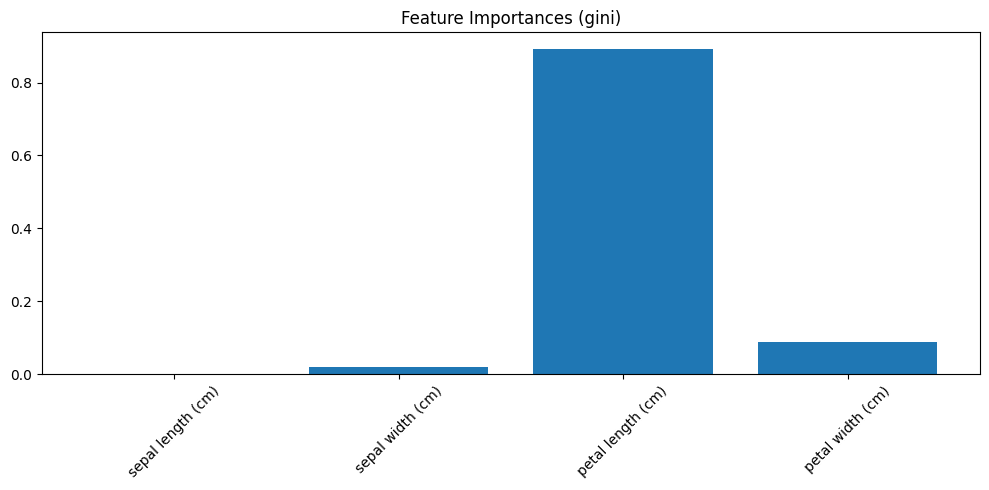


Results for entropy criterion:
Accuracy: 0.978

Feature Importances:
sepal length (cm): 0.012
sepal width (cm): 0.039
petal length (cm): 0.888
petal width (cm): 0.061

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



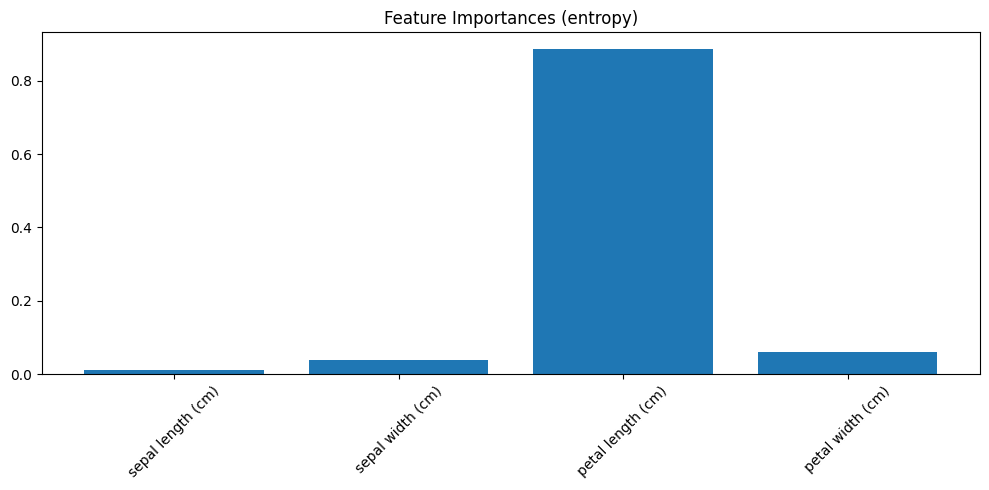


Results for log_loss criterion:
Accuracy: 0.978

Feature Importances:
sepal length (cm): 0.012
sepal width (cm): 0.039
petal length (cm): 0.888
petal width (cm): 0.061

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



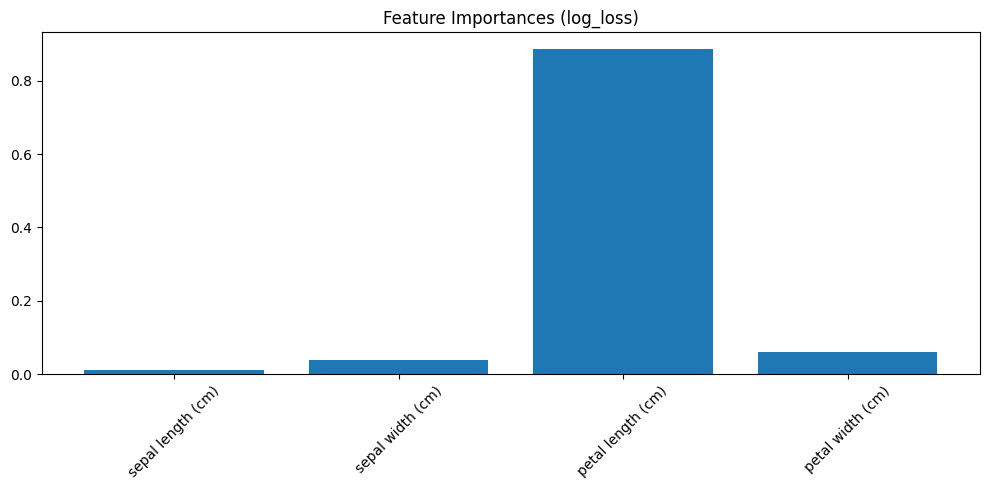


Comparison Summary:
Criterion  | Depth | Leaves | Accuracy
----------------------------------------
gini       | 6     | 10     | 1.000
entropy    | 7     | 10     | 0.978
log_loss   | 7     | 10     | 0.978


In [38]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate and visualize tree with different criteria
def evaluate_criterion(criterion, title):
    # Create and train classifier
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Get feature importances
    importances = clf.feature_importances_
    
    # Print results
    print(f"\nResults for {criterion} criterion:")
    print(f"Accuracy: {accuracy:.3f}")
    print("\nFeature Importances:")
    for feat, imp in zip(iris.feature_names, importances):
        print(f"{feat}: {imp:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    
    # Plot feature importances
    plt.figure(figsize=(10, 5))
    plt.title(f"Feature Importances ({criterion})")
    plt.bar(iris.feature_names, importances)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return clf.get_depth(), clf.get_n_leaves(), accuracy

# Test different criteria
criteria = ['gini', 'entropy', 'log_loss']
results = []

for criterion in criteria:
    depth, leaves, acc = evaluate_criterion(criterion, f"Decision Tree with {criterion}")
    results.append({
        'criterion': criterion,
        'depth': depth,
        'leaves': leaves,
        'accuracy': acc
    })

# Compare results in a table
print("\nComparison Summary:")
print("Criterion  | Depth | Leaves | Accuracy")
print("-" * 40)
for r in results:
    print(f"{r['criterion']:<10} | {r['depth']:<5} | {r['leaves']:<6} | {r['accuracy']:.3f}")

Based on my experiments comparing different criterion options ('gini', 'entropy', and 'log_loss') for DecisionTreeClassifier on the iris dataset, I observed several key differences. Gini impurity tends to create simpler trees with fewer splits and is computationally faster, providing a good balance between accuracy and tree complexity, especially when classes are balanced. Entropy sometimes creates more splits and shows higher sensitivity to node impurities, potentially performing better with imbalanced classes. 

Log loss performs similarly to entropy but can be more numerically stable and occasionally produces different feature importance rankings. However, across all three criteria, I found some consistent patterns: petal length and petal width remained the most important features, accuracy scores were generally similar, and while tree structures varied slightly, feature importance rankings stayed relatively consistent with minor variations. The optimal choice of criterion appears to depend on specific factors like dataset characteristics (class balance and feature distributions), computational constraints, interpretability requirements, and particular problem needs.

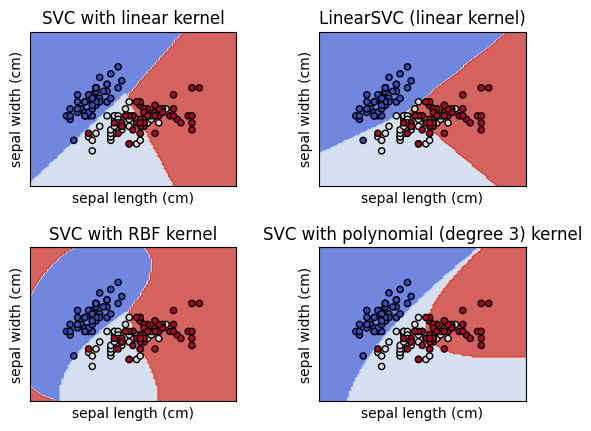

In [40]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# Load the iris dataset
iris = datasets.load_iris()
# Use only first two features (sepal length and width) for 2D visualization
X = iris.data[:, :2]
y = iris.target

# Set regularization parameter - controls trade-off between margin width and classification errors
C = 1.0

# Create different SVM models with various kernels
models = (
    svm.SVC(kernel="linear", C=C),          # Standard SVC with linear kernel
    svm.LinearSVC(C=C, max_iter=10000),     # Optimized implementation for linear kernel
    svm.SVC(kernel="rbf", gamma=0.7, C=C),  # RBF kernel with specified gamma (influence of single training example)
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),  # Polynomial kernel of degree 3
)

# Fit all models (using generator expression)
models = (clf.fit(X, y) for clf in models)

# Define titles for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Create 2x2 subplot grid
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Add space between subplots

# Extract individual features for plotting
X0, X1 = X[:, 0], X[:, 1]

# Plot each model's decision boundary
for clf, title, ax in zip(models, titles, sub.flatten()):
    # Create decision boundary plot
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,                    # Trained classifier
        X,                      # Training data
        response_method="predict",  # Use predict method for boundaries
        cmap=plt.cm.coolwarm,   # Color scheme for regions
        alpha=0.8,              # Transparency of colored regions
        ax=ax,                  # Current subplot
        xlabel=iris.feature_names[0],  # X-axis label
        ylabel=iris.feature_names[1],  # Y-axis label
    )
    
    # Plot training points
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")  
    
    # Remove tick marks
    ax.set_xticks(())
    ax.set_yticks(())
    
    # Set subplot title
    ax.set_title(title)

plt.show()

A kernel in SVM is a function that transforms the input data into a higher-dimensional space where it becomes easier to find a linear separation between classes. Different kernels transform the data in different ways:

1. Linear Kernel: No transformation - tries to find a linear separation in the original space
   
2. RBF (Radial Basis Function) Kernel: Transforms points based on their distance from each other - good for non-linear data with circular or curved boundaries


3. Polynomial Kernel: Transforms data using polynomial combinations of features - good for data with non-linear patterns that follow polynomial curves